This notebook is for highlighting molecules selected via Fresco that was not found on Manifold - ie they are not purchasable.

In [2]:
import rdkit
from rdkit import Chem
from rdkit import DataStructs

from rdkit.Chem import rdDepictor, rdMolDescriptors


from tqdm import tqdm
from rdkit.ML.Cluster.Butina import ClusterData

from IPython.core.display import display, HTML

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import mols2grid

rdDepictor.SetPreferCoordGen(True)

%pylab inline
print(rdkit.__version__)

cmap = plt.get_cmap("tab10")


INFO:rdkit:Enabling RDKit 2020.09.1 jupyter extensions


Populating the interactive namespace from numpy and matplotlib
2020.09.1


Mapping between Alpha's Enamine IDs (`df_ids`) and my previously selected molecules (`df_mpro`)

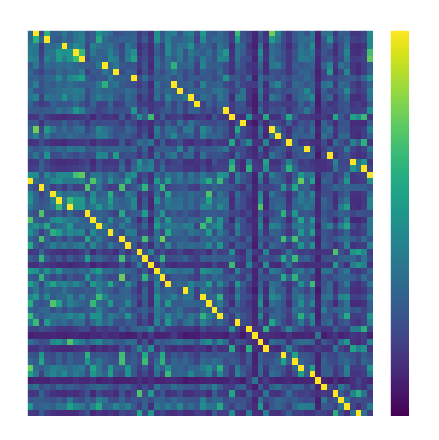

In [3]:
df_ids = pd.read_csv(
    '/home/wjm41/ml_physics/frag-pcore-screen/data/mpro_mols.csv')

df_mpro = pd.read_csv(
    '/home/wjm41/ml_physics/frag-pcore-screen/data/EnamineREAL/topN/mpro_taut_picks_constrained.csv')

df_ids['fps'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(
    Chem.MolFromSmiles(smi), 2, 2048, useFeatures=True) for smi in df_ids["smiles"]]  # pharmacophore fingerprint
df_mpro['fps'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(
    Chem.MolFromSmiles(smi), 2, 2048, useFeatures=True) for smi in df_mpro["smiles"]]  # pharmacophore fingerprint

sim_mat = np.empty((len(df_ids), len(df_mpro)))
for i in range(len(df_ids)):
    sim_mat[i] = np.array(
        DataStructs.BulkTanimotoSimilarity(df_ids['fps'].values[i], df_mpro['fps'].values))

fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
fig.suptitle('df_ids vs df_mpro')
cax = ax.matshow(sim_mat, aspect="auto", vmin=0, vmax=1)
ax.xaxis.set_ticks_position('bottom')
fig.colorbar(cax)
plt.show()

for ind in range(len(df_mpro)):
    assert sim_mat[ind, np.argmax(sim_mat[ind])] == 1.0
    df_mpro.at[np.argmax(sim_mat[ind]),
               'enamine'] = df_ids.iloc[ind]['enamine']
    df_mpro.at[np.argmax(sim_mat[ind]),
               'nonchiral'] = df_ids.iloc[ind]['smiles']



Display molecules that are not found in EnamineREAL:

In [4]:
display(df_mpro[df_mpro['enamine'].isnull()])


,smiles,membership,fps,enamine,nonchiral
2,[H]OC[C@H](CN([H])C(=O)c1cc(F)c(C)cc1F)N([H])C...,64,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",NaN,Cc1cc(F)c(C(=O)NCC(CO)NCc2cncs2)cc1F
10,[H]OC[C@H](CN([H])C(=O)Cc1cc(F)ccc1F)N([H])Cc1...,42,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",NaN,O=C(Cc1cc(F)ccc1F)NCC(CO)NCc1ccns1
16,[H]OC[C@H](CN([H])C(=O)c1cccnc1C)N([H])Cc1cc(F...,36,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",NaN,Cc1ncccc1C(=O)NCC(CO)NCc1cc(F)ccc1F
19,[H]N([H])C(=O)c1ccc(C(=O)N([H])C[C@@H]2CCN2C(=...,33,"[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NC(=O)c1ccc(C(=O)NCC2CCN2C(=O)c2ccns2)[nH]1
20,[H]OC[C@H](CN([H])C(=O)c1cc(C)sn1)N([H])Cc1ccc...,32,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",NaN,Cc1cc(C(=O)NCC(CO)NCc2ccc(F)c(F)c2)ns1
21,[H]N([H])C(=O)c1cc(C(=O)N(C)[C@@H]2CCN(C(=O)c3...,31,"[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,CN(C(=O)c1c[nH]c(C(N)=O)c1)C1CCN(C(=O)c2cocn2)C1
22,[H]OC[C@H](c1ccc(F)cc1)N([H])C(=O)c1ccc(Cl)c(S...,30,"[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",NaN,NS(=O)(=O)c1cc(C(=O)NC(CO)c2ccc(F)cc2)ccc1Cl
23,[H]OC[C@@H](CN([H])C(=O)c1c(F)ccc(C)c1F)N([H])...,30,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",NaN,Cc1ccc(F)c(C(=O)NCC(CO)NCc2nccs2)c1F
30,[H]O[C@H](CN([H])S(=O)(=O)c1cccc(C(=O)N([H])[H...,28,"[1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",NaN,NC(=O)c1cccc(S(=O)(=O)NCC(O)c2c(F)cccc2Cl)c1
41,[H]N([H])C(=O)c1ccc(C(=O)N(C)C[C@H](C)N([H])C(...,26,"[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,CC(CN(C)C(=O)c1ccc(C(N)=O)[nH]1)NC(=O)c1ccsn1


Attempt to get round the problem by recalculating the centroids of each cluter - Butina clustering from RDKit doesn't always return the true centroid in tanimoto space so here the centroids are recalculated

In [9]:
def calculate_tanimoto_distance_matrix(fps):
    dmat = np.empty((len(fps), len(fps)))
    for i in range(len(fps)):
        dmat[i] = np.ones_like(
            len(fps)) - np.array(DataStructs.BulkTanimotoSimilarity(fps[i], fps))
    return dmat

def get_correct_centroids(df_butina_clustered):
    butina_clusters = df_butina_clustered.groupby('cluster')

    list_of_centroid_smiles = []
    list_of_cluster_size = []
    for cluster, df_of_a_cluster in tqdm(butina_clusters):
        df_of_a_cluster = df_of_a_cluster.reset_index()
        list_of_cluster_size.append(len(df_of_a_cluster))
        dmat = calculate_tanimoto_distance_matrix(df_of_a_cluster['fps'].values)
        index_of_the_centroid = np.argmin(np.amax(dmat, axis=1))
        list_of_centroid_smiles.append(df_of_a_cluster.iloc[index_of_the_centroid]['smiles'])

    df_of_new_centroids = df_butina_clustered[df_butina_clustered['smiles'].isin(list_of_centroid_smiles)]

    column_for_correct_sorting_of_dataframe = pd.Categorical(df_of_new_centroids['smiles'], categories=list_of_centroid_smiles, ordered=True)
    df_of_new_centroids['sort_cat'] = column_for_correct_sorting_of_dataframe
    df_of_new_centroids.sort_values('sort_cat', inplace=True)
    df_of_new_centroids.reset_index(inplace=True)
    df_of_new_centroids['membership'] = list_of_cluster_size
    return df_of_new_centroids


In [13]:
df_butina_clustered_mpro = pd.read_csv(
    '/home/wjm41/ml_physics/frag-pcore-screen/data/EnamineREAL/topN/mpro_taut_clustered.csv')
df_butina_clustered_mpro['mol'] = df_butina_clustered_mpro['nonchiral'].apply(
    Chem.MolFromSmiles)
df_butina_clustered_mpro['fps'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(
    Chem.MolFromSmiles(smi), 2, 2048, useFeatures=True) for smi in tqdm(df_butina_clustered_mpro["smiles"])]  # pharmacophore fingerprint

df_new_centroids_mpro = get_correct_centroids(df_butina_clustered_mpro)
df_new_centroids_mpro.rename(columns={'cluster': 'cluster_index', 'membership': 'cluster_membership'}, inplace=True)
df_new_centroids_mpro[['smiles', 'nonchiral', 'cluster_index', 'cluster_membership']]


100%|██████████| 24748/24748 [00:18<00:00, 1349.42it/s]
/rds-d2/user/wjm41/hpc-work/conda/envs/fresco/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/rds-d2/user/wjm41/hpc-work/conda/envs/fresco/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/rds-d2/user/wjm41/hpc-work/conda/envs/fresco/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,smiles,nonchiral,cluster_index,cluster_membership
0,[H]OC[C@H](c1cc(F)ccc1F)N([H])C(=O)N([H])c1cccc(C(=O)N([H])[H])c1,NC(=O)c1cccc(NC(=O)NC(CO)c2cc(F)ccc2F)c1,0,100
1,[H]N([H])S(=O)(=O)c1ccc(F)c(CN([H])S(=O)(=O)c2ccccc2F)c1,NS(=O)(=O)c1ccc(F)c(CNS(=O)(=O)c2ccccc2F)c1,1,81
2,[H]OC[C@@H](CN([H])C(=O)c1cc(F)c(C)cc1F)N([H])Cc1cncs1,Cc1cc(F)c(C(=O)NCC(CO)NCc2cncs2)cc1F,2,64
3,[H]N(Cc1ccc(F)c(F)c1)C(=O)c1cc(S(=O)(=O)N([H])[H])ccc1Cl,NS(=O)(=O)c1ccc(Cl)c(C(=O)NCc2ccc(F)c(F)c2)c1,3,52
4,[H]N([H])C(=O)[C@H](c1ccc(F)cc1)N([H])C(=O)N([H])c1cc(F)ccc1OC,COc1ccc(F)cc1NC(=O)NC(C(N)=O)c1ccc(F)cc1,4,52
...,...,...,...,...
24743,[H]OC1=NC(=O)N(CC(=O)N(C)[C@@H](C)CN([H])C(=O)CN([H])C(=O)OC)C1,COC(=O)NCC(=O)NCC(C)N(C)C(=O)CN1CC(O)=NC1=O,24743,1
24744,[H]N(Cc1ccn2ccnc2c1)C(=O)N([H])c1cc(F)cc(S(=O)(=O)N([H])[H])c1,NS(=O)(=O)c1cc(F)cc(NC(=O)NCc2ccn3ccnc3c2)c1,24744,1
24745,[H]N(Cc1cccc2c1ccn2[H])C(=O)N([H])c1cc(F)cc(S(=O)(=O)N([H])[H])c1,NS(=O)(=O)c1cc(F)cc(NC(=O)NCc2cccc3[nH]ccc23)c1,24745,1
24746,[H]N(CC(C)(C)N1CCN(C)CC1)C(=S)N([H])C1CCN(C)CC1,CN1CCC(NC(=S)NCC(C)(C)N2CCN(C)CC2)CC1,24746,1


Show new selected molecules for each cluster - highlight new selections for clusters without enamine ID

In [15]:
import re

def highlight_null_rows_conditional(s, null_column, condition_column):
    null_series = pd.Series(data=False, index=s.index)
    null_series[null_column] = s.loc[null_column].isnull()

    condition_series = pd.Series(data=False, index=s.index)
    condition_series[condition_column] = s.loc[condition_column]
    return ['background-color: #b9d2b1' if null_series.any() and condition_series.any() else 'background-color: #b96f74' if null_series.any() and not condition_series.any() else '' for v in null_series]


picked_mols_from_new_centroids = df_new_centroids_mpro.iloc[:80]

df_mpro = df_mpro[['smiles', 'enamine', 'nonchiral']]
df_mpro['cluster_index'] = range(len(df_mpro))

df_joined = df_mpro.merge(
    picked_mols_from_new_centroids[['smiles', 'nonchiral', 'cluster_index', 'cluster_membership']], how='outer', on='cluster_index')
df_joined['smiles_are_different'] = df_joined['smiles_x'].ne(df_joined['smiles_y'])
df_joined = df_joined[['smiles_are_different',  'enamine', 'cluster_membership', 'smiles_x', 'smiles_y']]
df_joined = df_joined.rename(columns=lambda x: re.sub('_x', '_old', x))
df_joined = df_joined.rename(columns=lambda x: re.sub('_y', '_new', x))

pd.set_option('max_rows', None)
pd.set_option('max_colwidth', None)
df_joined.style.apply(highlight_null_rows_conditional, 
                      null_column=['enamine'], 
                      condition_column=['smiles_are_different'], axis=1)


,smiles_are_different,enamine,cluster_membership,nonchiral_old,nonchiral_new,smiles_old,smiles_new
0,True,s_2430____739576____13420436,100,NC(=O)c1cccc(NC(=O)NC(CO)c2cc(F)ccc2F)c1,NC(=O)c1cccc(NC(=O)NC(CO)c2cc(F)ccc2F)c1,[H]OC[C@@H](c1cc(F)ccc1F)N([H])C(=O)N([H])c1cccc(C(=O)N([H])[H])c1,[H]OC[C@H](c1cc(F)ccc1F)N([H])C(=O)N([H])c1cccc(C(=O)N([H])[H])c1
1,True,Z1212951946,81,NS(=O)(=O)c1ccc(F)c(CNS(=O)(=O)c2ccccc2Cl)c1,NS(=O)(=O)c1ccc(F)c(CNS(=O)(=O)c2ccccc2F)c1,[H]N([H])S(=O)(=O)c1ccc(F)c(CN([H])S(=O)(=O)c2ccccc2Cl)c1,[H]N([H])S(=O)(=O)c1ccc(F)c(CN([H])S(=O)(=O)c2ccccc2F)c1
2,True,nan,64,Cc1cc(F)c(C(=O)NCC(CO)NCc2cncs2)cc1F,Cc1cc(F)c(C(=O)NCC(CO)NCc2cncs2)cc1F,[H]OC[C@H](CN([H])C(=O)c1cc(F)c(C)cc1F)N([H])Cc1cncs1,[H]OC[C@@H](CN([H])C(=O)c1cc(F)c(C)cc1F)N([H])Cc1cncs1
3,True,s_22____2691242____60722,52,NS(=O)(=O)c1ccc(F)c(C(=O)NCc2ccc(F)c(Cl)c2)c1,NS(=O)(=O)c1ccc(Cl)c(C(=O)NCc2ccc(F)c(F)c2)c1,[H]N(Cc1ccc(F)c(Cl)c1)C(=O)c1cc(S(=O)(=O)N([H])[H])ccc1F,[H]N(Cc1ccc(F)c(F)c1)C(=O)c1cc(S(=O)(=O)N([H])[H])ccc1Cl
4,True,s_2430____1199926____9358236,52,COc1ccc(Br)cc1NC(=O)NC(C(N)=O)c1ccc(F)cc1,COc1ccc(F)cc1NC(=O)NC(C(N)=O)c1ccc(F)cc1,[H]N([H])C(=O)[C@H](c1ccc(F)cc1)N([H])C(=O)N([H])c1cc(Br)ccc1OC,[H]N([H])C(=O)[C@H](c1ccc(F)cc1)N([H])C(=O)N([H])c1cc(F)ccc1OC
5,False,s_2718____6579688____867166,48,O=C(Nc1cc(F)ccc1F)C(=O)NC(CO)c1ccccc1,O=C(Nc1cc(F)ccc1F)C(=O)NC(CO)c1ccccc1,[H]OC[C@@H](c1ccccc1)N([H])C(=O)C(=O)N([H])c1cc(F)ccc1F,[H]OC[C@@H](c1ccccc1)N([H])C(=O)C(=O)N([H])c1cc(F)ccc1F
6,True,s_1458____473332____485210,45,NS(=O)(=O)c1cccc(NC(=O)COC(=O)c2ccc(Cl)cc2)c1,NS(=O)(=O)c1cccc(NC(=O)COC(=O)c2ccc(F)cc2)c1,[H]N(C(=O)COC(=O)c1ccc(Cl)cc1)c1cccc(S(=O)(=O)N([H])[H])c1,[H]N(C(=O)COC(=O)c1ccc(F)cc1)c1cccc(S(=O)(=O)N([H])[H])c1
7,False,s_2718____2054222____5176086,44,O=C(NCC(O)c1cccc(F)c1)C(=O)Nc1cc(Br)ccc1F,O=C(NCC(O)c1cccc(F)c1)C(=O)Nc1cc(Br)ccc1F,[H]O[C@H](CN([H])C(=O)C(=O)N([H])c1cc(Br)ccc1F)c1cccc(F)c1,[H]O[C@H](CN([H])C(=O)C(=O)N([H])c1cc(Br)ccc1F)c1cccc(F)c1
8,False,s_2718____870070____867030,43,CC(=O)Nc1cccc(CNC(=O)C(=O)Nc2cccc(F)c2)c1,CC(=O)Nc1cccc(CNC(=O)C(=O)Nc2cccc(F)c2)c1,[H]N(Cc1cccc(N([H])C(C)=O)c1)C(=O)C(=O)N([H])c1cccc(F)c1,[H]N(Cc1cccc(N([H])C(C)=O)c1)C(=O)C(=O)N([H])c1cccc(F)c1
9,False,Z753689648,43,NC(=O)c1ccc(F)c(NC(=O)C(=O)NCc2ccccc2)c1,NC(=O)c1ccc(F)c(NC(=O)C(=O)NCc2ccccc2)c1,[H]N([H])C(=O)c1ccc(F)c(N([H])C(=O)C(=O)N([H])Cc2ccccc2)c1,[H]N([H])C(=O)c1ccc(F)c(N([H])C(=O)C(=O)N([H])Cc2ccccc2)c1


Many molecules with different centroid picks but still a few stragglers - ended up fixing by hand by searing on the enamine website.